In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

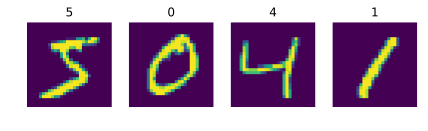

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(7, 3))

for img, label, ax in zip(x_train[:4], y_train[:4], axes): 
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [35]:
print(f'train images: {x_train.shape}')
print(f'train labels: {y_train.shape}')
print(f'test images: {x_test.shape}')
print(f'test labels: {y_test.shape}')

train images: (60000, 28, 28)
train labels: (60000,)
test images: (10000, 28, 28)
test labels: (10000,)


In [36]:
# preprocessing
x_train = x_train.reshape(60000, 28 * 28) / 255
x_test = x_test.reshape(10000, 28 * 28)/255

with tf.Session() as sesh: 
    y_train = sesh.run(tf.one_hot(y_train, 10))
    y_test = sesh.run(tf.one_hot(y_test, 10))

In [37]:
y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
# hyperparameters
learning_rate = 0.01
epochs = 15
batch_size = 100
batches = int(x_train.shape[0] / batch_size)

In [39]:
# inputs
# X is our "flattended / normalized" images (the preprocessing we did before)
# Y is our "one hot" labels

# input data
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# the stuff we want to learn
W = tf.Variable(0.1 * np.random.rand(784, 10).astype(np.float32))
B = tf.Variable(0.1 * np.random.rand(10).astype(np.float32))

In [40]:
pred = tf.nn.softmax(tf.add(tf.matmul(X, W), B)) #matmul = matrix multiplication
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

epoch:0, cost=0.2981
epoch:1, cost=0.7422
epoch:2, cost=0.4968
epoch:3, cost=0.4193
epoch:4, cost=0.4329
epoch:5, cost=0.5113
epoch:6, cost=0.4048
epoch:7, cost=0.3597
epoch:8, cost=0.4512
epoch:9, cost=0.2635
epoch:10, cost=0.2136
epoch:11, cost=0.2776
epoch:12, cost=0.5734
epoch:13, cost=0.4942
epoch:14, cost=0.4215
0.9004


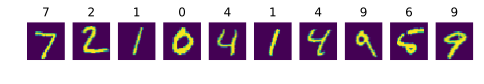

In [43]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = x_train[offset: offset + batch_size]
            y = y_train[offset: offset + batch_size]
            sesh.run(optimizer, feed_dict={X: x, Y: y})
            c = sesh.run(cost, feed_dict={X: x, Y: y})
            
        if not epoch % 1:
            print(f'epoch:{epoch}, cost={c:.4f}')
            
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    acc = accuracy.eval({X: x_test, Y: y_test}) #same as calling it in a session
    print(acc)
    
    fig, axes = plt.subplots(1, 10, figsize=(8,4))
    for img, ax in zip(x_test[:10], axes):
        guess = np.argmax(sesh.run(pred, feed_dict={X: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape(28,28))
        ax.axis('off')